In [1]:
#install required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras import metrics 
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

2022-04-08 16:13:42.662431: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-08 16:13:42.662469: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Using TensorFlow backend.

In [20]:
tf.keras.datasets.fashion_mnist.load_data()
#read mnist fashion dataset
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [21]:
#five fold cross validation
#total rows= 70000
#splitting 5 fold so each split has 14000 now here 4/5 give it to training and 1/5 to testing data
X=np.concatenate((X_train,X_test))
Y=np.concatenate((y_train,y_test))
print(X.shape,Y.shape)
X_train=X[:56000,:,:,:]
y_train=Y[:56000]
X_test=X[56000:,:,:,:]
y_test=Y[56000:]


(70000, 28, 28, 1) (70000,)


In [4]:
# #reshape data from 3-D to 2-D array
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# #feature scaling
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# #fit and transform training dataset
# X_train = minmax.fit_transform(X_train)
# #transform testing dataset
# X_test = minmax.transform(X_test)
# print('Number of unique classes: ', len(np.unique(y_train)))
# print('Classes: ', np.unique(y_train))

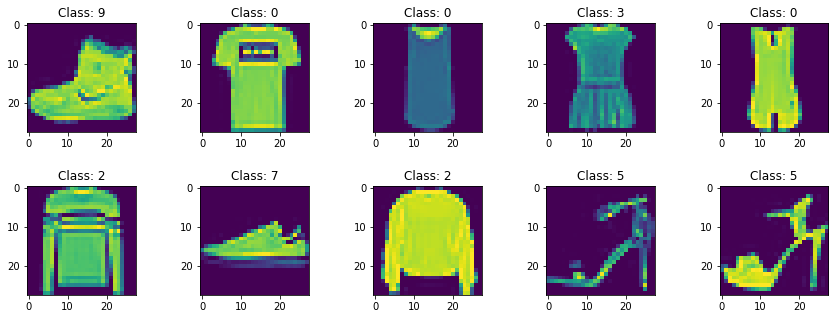

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))              
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [23]:
X_train.shape

(56000, 28, 28, 1)

In [24]:
#initializing CNN model
classifier_e25 = Sequential()
#adding convo2D 
classifier_e25.add( Convolution2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
#Maxpooling
classifier_e25.add(MaxPooling2D(2,2))
classifier_e25.add(Flatten())

#add 1st hidden layer
classifier_e25.add(Dense( 100,activation='relu'))
#add output layer
classifier_e25.add(Dense(100, activation='softmax'))
#compile the neural network
classifier_e25.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model summary
classifier_e25.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 100)               1081700   
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
Total params: 1,092,440
Trainable params: 1,092,440
Non-trainable params: 0
____________________________________________

In [25]:
#fit training dataset into the model
classifier_e25_fit = classifier_e25.fit(X_train, y_train, epochs=10, verbose=1)

2022-04-08 16:30:01.756161: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 175616000 exceeds 10% of free system memory.


Epoch 1/10
1750/1750 [==============================] - 39s 22ms/step - loss: 0.4247 - accuracy: 0.8518
Epoch 2/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.2780 - accuracy: 0.8997
Epoch 3/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.2329 - accuracy: 0.9144
Epoch 4/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.2027 - accuracy: 0.9254
Epoch 5/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.1738 - accuracy: 0.9356
Epoch 6/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.1482 - accuracy: 0.9451
Epoch 7/10
1750/1750 [==============================] - 39s 22ms/step - loss: 0.1268 - accuracy: 0.9528
Epoch 8/10
1750/1750 [==============================] - 39s 22ms/step - loss: 0.1063 - accuracy: 0.9616
Epoch 9/10
1750/1750 [==============================] - 39s 22ms/step - loss: 0.0892 - accuracy: 0.9668
Epoch 10/10
1750/1750 [==============================] - 39s 22m

In [26]:
#evaluate the model for testing dataset
test_loss_e25 = classifier_e25.evaluate(X_test, y_test, verbose=0)
#calculate evaluation parameters
#f1_e25 = f1_score(y_test, classifier_e25.predict_classes(X_test), average='micro')
#roc_e25 = roc_auc_score(y_test, classifier_e25.predict_proba(X_test), multi_class='ovo')
#create evaluation dataframe
stats_e25 = pd.DataFrame({'Test accuracy' :  round(test_loss_e25[1]*100,3),
                      'Total Loss'    : round(test_loss_e25[0],3)}, index=[0])
#print evaluation dataframe
display(stats_e25)

,Test accuracy,Total Loss
0,91.193,0.313
